In [36]:
!pip install numpy

In [37]:
!pip install matplotlib

In [38]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv


def plot_data(d, is_title=False, title=''):
    for r in d:

        if r[4] == 'setosa':
            c = 'red'
        elif r[4] == 'versicolor':
            c = 'green'
        elif r[4] == 'virginica':
            c = 'blue'
        else:
            c = 'black'

        plt.plot(float(r[2]), float(r[3]), linestyle='none', marker='o', color=c)

    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    if is_title:
        plt.title(title)
    pass


def k_means(k, d):
    averages = k * [[0.0, 0.0]]
    for index in range(k):
        while True:
            rand_point = random.randint(0, len(d))
            if not averages.__contains__([float(d[rand_point][2]), float(d[rand_point][3])]):
                break
        averages[index] = [float(d[rand_point][2]), float(d[rand_point][3])]

    objective_function = []

    iterations = 0

    while True:
        iterations += 1

        if len(d) == 150:
            plot_data(d)
            for average in averages:
                plt.plot(average[0], average[1], color='black', marker='o', linestyle='none')

            objective_function.append(obj_function(d, averages))

            plt.title('k-means clustering for ' + str(k) + ' Clusters, Iteration: ' + str(iterations))
            plt.show()

        last_averages = averages.copy()

        averages = [[0.0, 0.0] for i in range(k)]
        num_points = k * [0.0]
        for r in d:
            index = last_averages.index(closest_mean([r[2], r[3]], last_averages))

            num_points[index] += 1.0

            averages[index][0] += float(r[2])
            averages[index][1] += float(r[3])

        for index in range(k):
            averages[index][0] /= num_points[index]
            averages[index][1] /= num_points[index]

        if last_averages == averages:
            if len(d) == 150:
                plt.plot(range(len(objective_function)), objective_function, 'ko')
                plt.plot(range(len(objective_function)), objective_function, 'k')
                plt.xlabel('Iteration')
                plt.ylabel('Sum of Error Squared')
                plt.title('Objective Function for ' + str(k) + ' Clusters')
                plt.show()
                return [averages, objective_function]
            else:
                return [averages, 0]

def obj_function(d, means):
    sse = 0.0

    for r in d:
        sse += math.pow(get_distance([float(r[2]), float(r[3])], closest_mean([float(r[2]), float(r[3])], means)), 2)

    return sse
 
def get_distance(pa, pb):

    return math.sqrt(math.pow(pa[0] - pb[0], 2) + math.pow(pa[1] - pb[1], 2))

def closest_mean(r, means):
    distance = 99.9
    closest_mean = [0.0, 0.0]

    for mean in means:
        d = get_distance([float(r[0]), float(r[1])], mean)

        if d < distance:
            distance = d
            closest_mean = [float(mean[0]), float(mean[1])]

    return closest_mean

def decision_bounds(point1, point2, t):
    x_constant = (point1[0] + point2[0]) / 2.0
    y_constant = (point1[1] + point2[1]) / 2.0

    slope = abs(point2[0] - point1[0]) / abs(point2[1] - point1[1])
    return y_constant - (t - x_constant) / slope




def get_likelihood(point, cluster, clusters):
    distance_test = 1.0 / get_distance(point, cluster)

    distance_all = 0.0
    for c in clusters:
        distance_all += 1.0 / get_distance(point, c)

    return distance_test / distance_all

def plot_decision_boundaries(num_clusters, iris_data, t):
    uk = []
    d = []

    output = k_means(num_clusters, iris_data)
    uk.append(output[0])
    d.append(output[1])
    plot_data(iris_data)

    for index in range(len(uk[0])):
        p1 = [uk[0][index][0], uk[0][index][1]]
        plt.plot(p1[0], p1[1], 'ko', linestyle='none')

        for index2 in range((index + 1), len(uk[0])):
            p2 = uk[0][index2][0], uk[0][index2][1]

            x = (p1[0] + p2[0]) / 2.0
            y = (p1[1] + p2[1]) / 2.0

            m = abs(p2[0] - p1[0]) / abs(p2[1] - p1[1])
            line = y - (t - x) / m

            l1 = get_likelihood([x, y], p1, uk[0])
            l3 = 1.0 - (2.0 * l1)
            if l3 < l1:
                plt.plot(t, line, 'c:')

    names = ['Setosa', 'Versicolor', 'virginica', 'Cluster', 'Decision Boundaries']
    colors = ['r', 'g', 'b', 'k', 'c']
    hands = []

    for i in range(5):
        hands.append(mpatches.Patch(color=colors[i], label=names[i]))

    plt.legend(handles=hands, loc='upper left')

    if len(iris_data) == 150:
        plt.xlim(0.0, 7.1)
        plt.ylim(0.0, 2.6)
    else:
        plt.xlim(2.9, 7.1)
        plt.ylim(0.9, 2.6)

    plt.title('Decision Boundaries for ' + str(num_clusters) + ' Clusters')
    plt.show()

    pass


def plot_nn(d, m, b):
    ax = plt.axes(projection='3d')
    for v in d:
        x = float(v[2])
        y = float(v[3])
        if v[4] == 'versicolor':
            color = 'b'
        else:
            color = 'g'

        plt.plot(x, y, sigmoid(m * x - y + b), 'o', color=color)

    plt.show()

    pass
        
def plot_nn_decision_bounds(d, m, b, point):
    time = np.linspace(3.0, 7.0, 200)

    plot_data(d)
    plt.plot(time, m * time + b, 'c')
    plt.ylim(0.9, 2.6)
    plt.title('Decision Boundary for Non-Linearity')
    plt.show()

    # z = mx - y + b
    return 1.0 - sigmoid(m * point[0] - point[1] + b)

def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

def simple_classifier(d, m, b, k):
    v = d[k]
    print('Point: ' + str(v))
    print(sigmoid(m * float(v[2]) - float(v[3]) + b))

    pass

def plot_data_line(d, w0, w1, w2, color='c', marker='solid', show=False):
    plot_data(d)
    plt.axline(xy1=(0, -w0 / w2), xy2=(-w0 / w1, 0), color=color, linestyle=marker)

    plt.xlim(2.9, 7.1)
    plt.ylim(0.9, 2.6)

    if show:
        plt.show()

    pass

def actualPoint(flower):
    if flower == 'versicolor':
        return 0.0
    else:
        return 1.0
    
def meanSquaredError(d, w0, w1, w2, color='c', marker='-', plot=True):
    if not plot:
        plot_data_line(d, w0, w1, w2, color=color, marker=marker)

    E = 0.0
    for r in d:
        x1 = float(r[2])
        x2 = float(r[3])

        z = w0 + w1 * x1 + w2 * x2
        sigma = sigmoid(z)

        v = actualPoint(r[4])

        E += math.pow(v - sigma, 2)

    return E / (2.0 * len(d))


def meanSquaredError_2Points(d, w00, w10, w20, w01, w11, w21):
    meanSquaredError0 = meanSquaredError(d, w00, w10, w20, 'c', 'solid')
    meanSquaredError1 = meanSquaredError(d, w01, w11, w21, 'r', 'dashed')
    plt.show()
    return 0 

def gradient_sum(d, w0, w1, w2, plot=True):
    
    # f(z) = 1/(1 + e-z)
    # f'(z) = (e-z)/(1 + e-z)2
    # z = mx - y + b

    # f'(x) = m(e(y - mx - b))/(1 + e(y - mx - b))2
    # f'(y) = -(e(y - mx - b))/(1 + e(y - mx - b))2


    if plot:
        plot_data_line(d, w0, w1, w2)

    grad_w0 = 0.0
    grad_w1 = 0.0
    grad_w2 = 0.0

    for r in d:
        x1 = float(r[2])
        x2 = float(r[3])

        z = w0 + w1 * x1 + w2 * x2

        v = actualPoint(r[4])

        sigma = sigmoid(z)

        d_sigma = math.exp(-z)/math.pow((1 + math.exp(-z)), 2)

        df_dz = 2.0 * (v - sigma) * -d_sigma

        grad_w0 += df_dz * 1
        grad_w1 += df_dz * x1
        grad_w2 += df_dz * x2

    grad_w0 /= len(d)
    grad_w1 /= len(d)
    grad_w2 /= len(d)

    #
    step_size = -10.0
    if plot:
        plot_data_line(d, w0 + grad_w0 * step_size, w1 + grad_w1 * step_size, w2 + grad_w2 * step_size, 'r')
        plt.show()

    return [grad_w0, grad_w1, grad_w2]

def gradient_decent(d, w0, w1, w2, plot_learning_curve=False):
    step = 0.1
    stopping_criteria = 0.01
    learning_curve = []

    while True:
        g = gradient_sum(d, w0, w1, w2, False)
        w0 -= g[0] * step
        w1 -= g[1] * step
        w2 -= g[2] * step

        norm = math.sqrt(g[0] * g[0] + g[1] * g[1] + g[2] * g[2])
        learning_curve.append(norm)

        if norm < stopping_criteria:
            if plot_learning_curve:
                return [[w0, w1, w2], learning_curve]
            return [w0, w1, w2]


def show_gradient_decent(d, w0, w1, w2, show_curve=True):
    plot_data_line(d, w0, w1, w2)

    if show_curve:
        line, curve = gradient_decent(d, w0, w1, w2, True)
        plot_data_line(d, line[0], line[1], line[2], 'r')
        plt.show()

        plt.plot(range(len(curve)), curve, 'k')
        plt.xlabel('Iterations')
        plt.ylabel('Norm of Gradient')
        plt.show()
        return line, curve

    else:
        line = gradient_decent(d, w0, w1, w2)
        plot_data_line(d, line[0], line[1], line[2], 'r')
        plt.show()
        return line


def random_gradient_decent(d):
    np.random.seed(1234)
    w = np.random.uniform(-5, 5, 3)
    return show_gradient_optimized(d, w[0], w[1], w[2], True)
    


# This is for Question 1
## Exercises 1a-d for k = 2

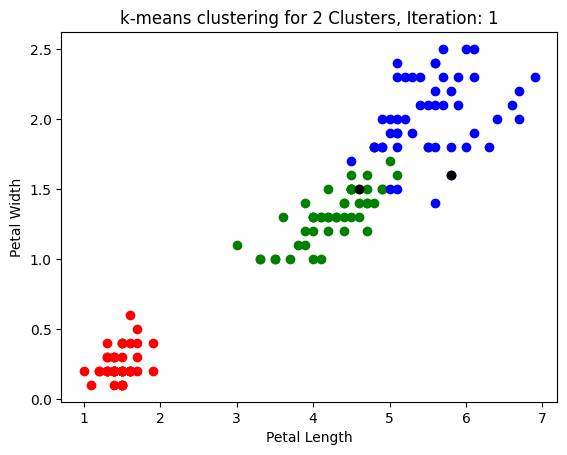

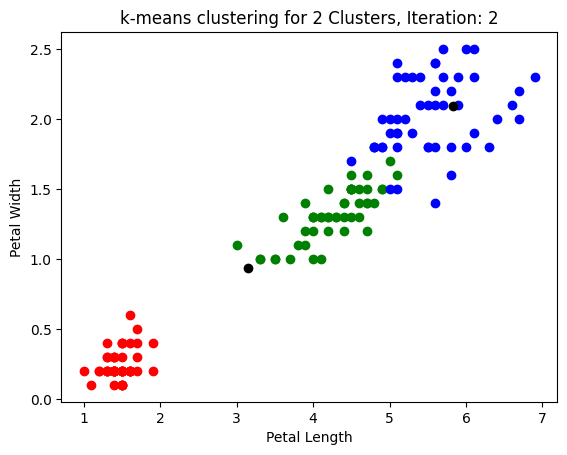

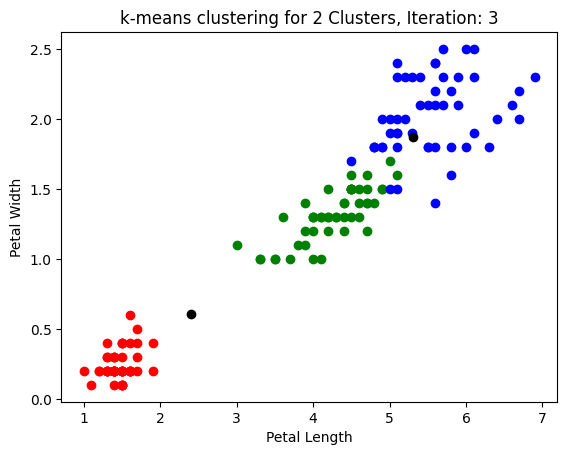

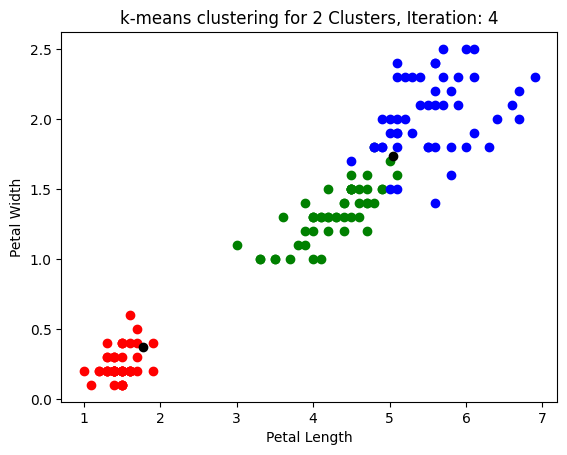

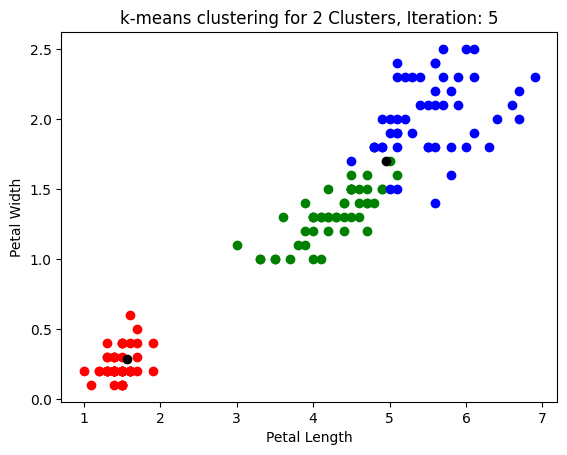

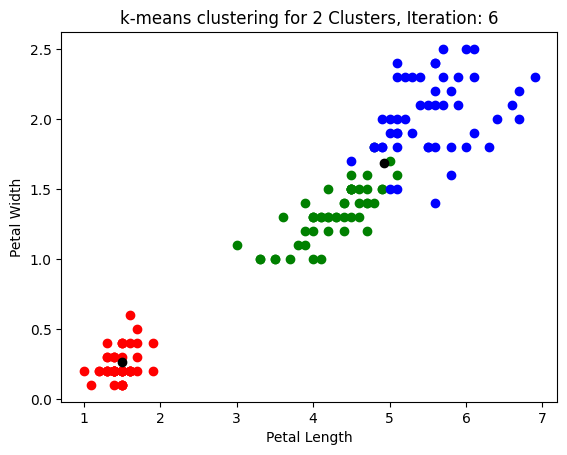

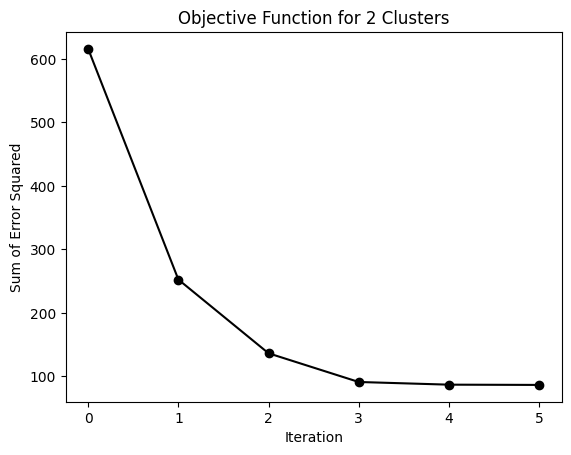

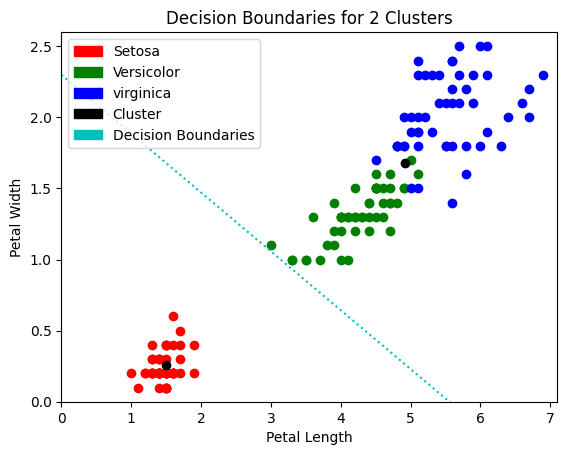

In [39]:
with open('irisdata.csv') as file:
    heading = next(file)

    iris = csv.reader(file)
    data = []

    for row in iris:
        data.append(row)
    
    t = np.linspace(0.0, 7.0, 200)

    
    plot_decision_boundaries(2,data,t)

## Exercises 1a-d for k = 3

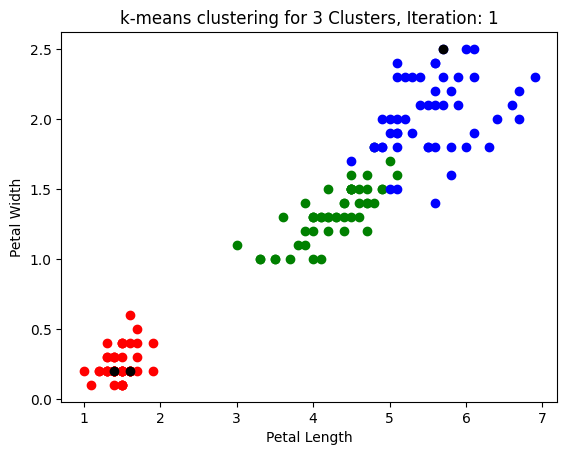

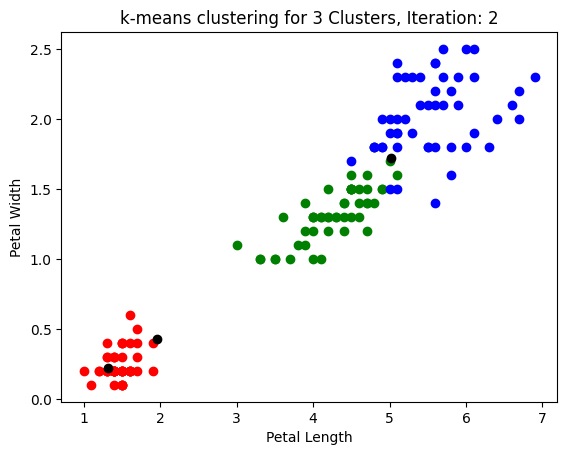

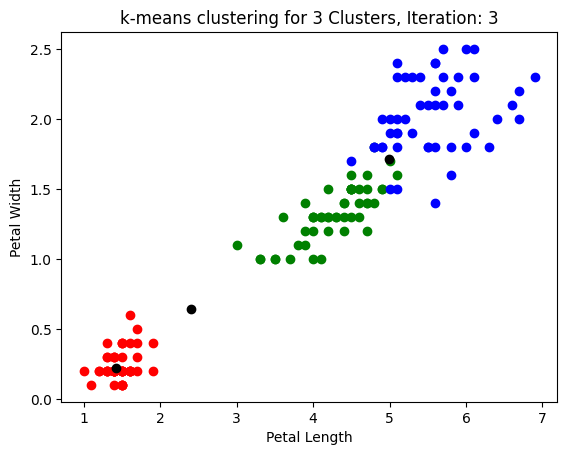

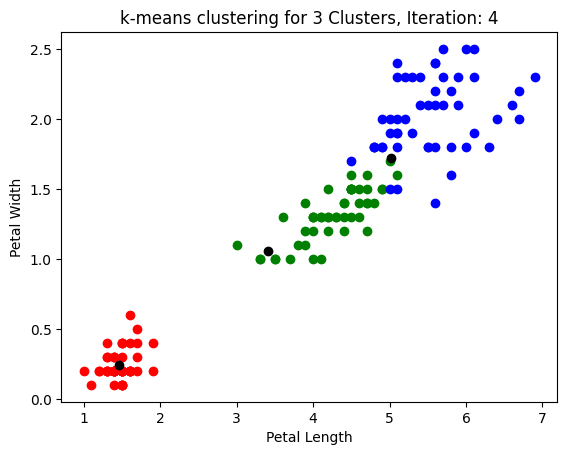

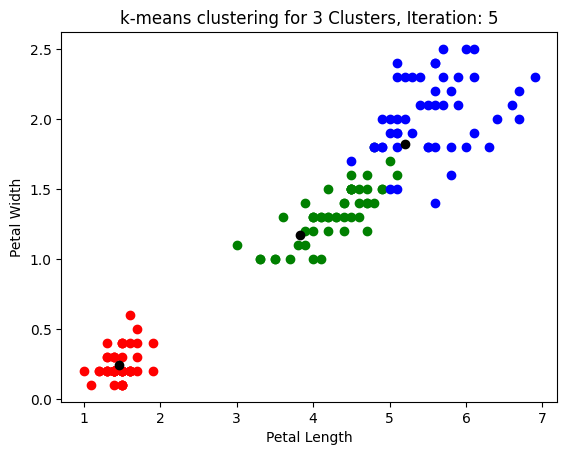

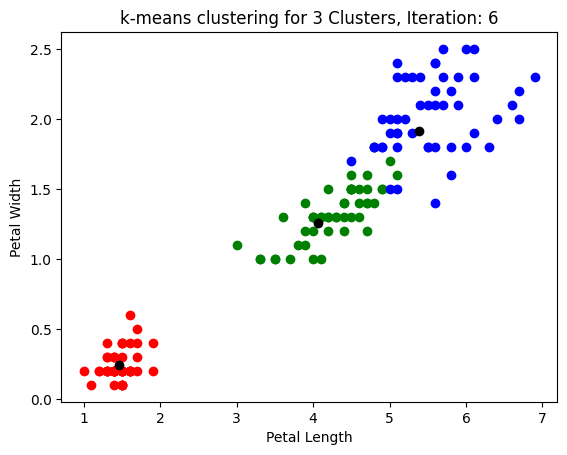

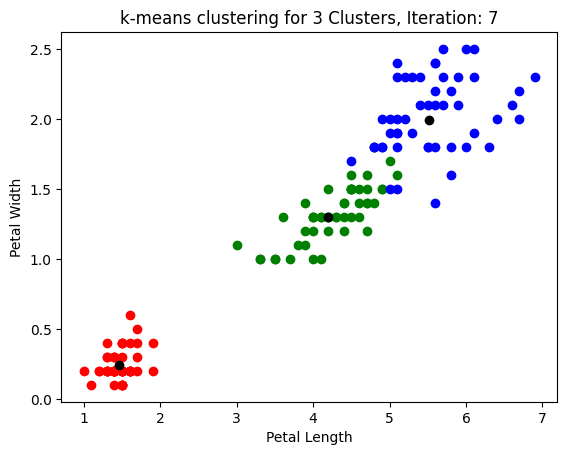

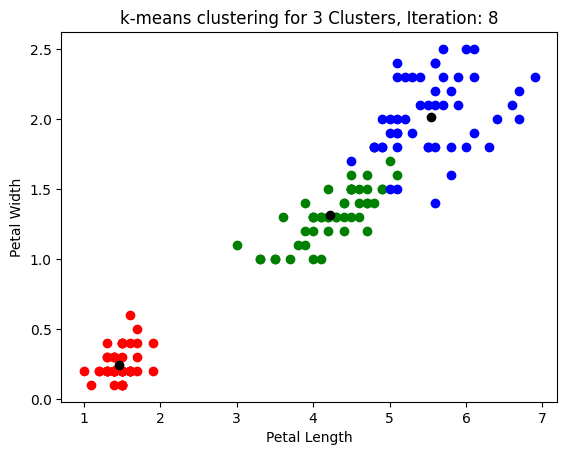

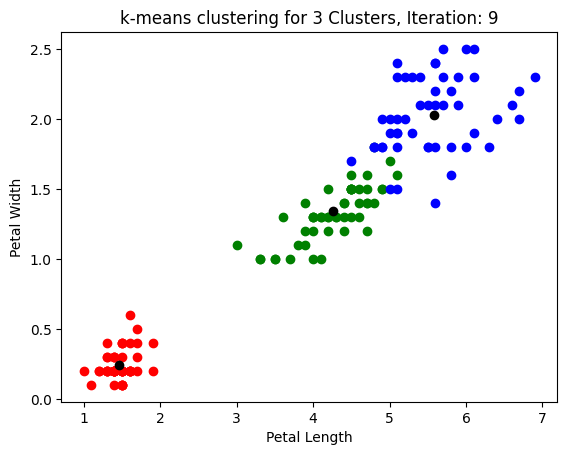

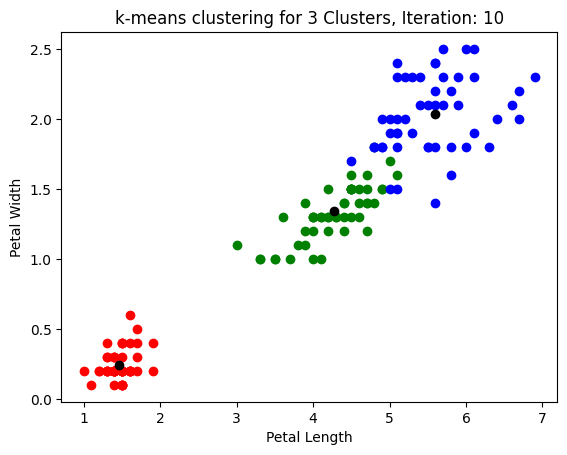

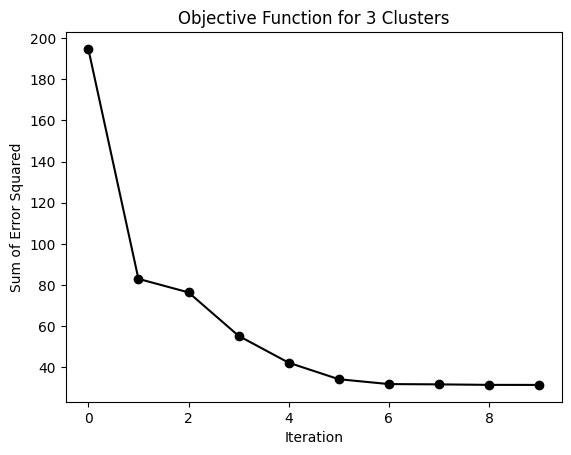

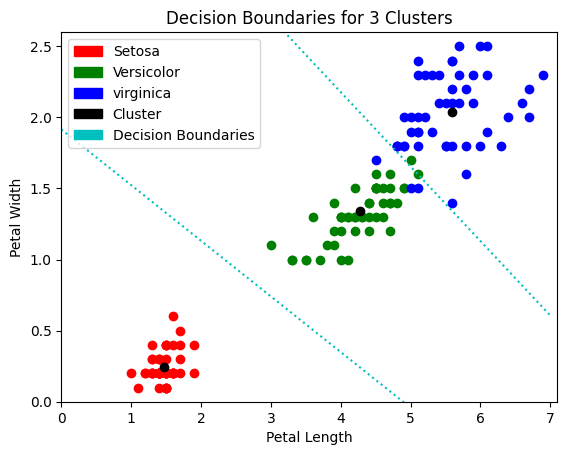

In [40]:
plot_decision_boundaries(3,data,t)

# Question 2
# Exercise 2a

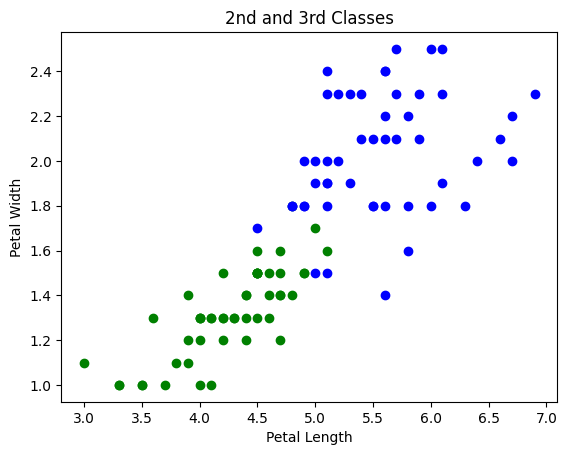

In [41]:
# Get data for just the 2nd and 3rd iris classes
v_data = []
start = 50
while start < 150:
    v_data.append(data[start])
    start += 1

    # Exercise 2a
plot_data(v_data, True, '2nd and 3rd Classes')
plt.show()

# Exercise 2b

In [42]:
print(sigmoid(-0.5 * 4.7 - 1.1 + 4.1))

0.6570104626734987


# Exercise 2c

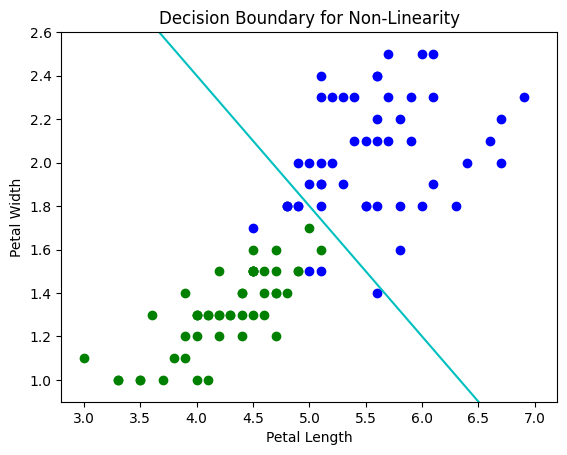

0.6224593312018546


In [43]:
print(plot_nn_decision_bounds(v_data, -0.6, 4.8, [5.5, 2.0]))

# Exercise 2d

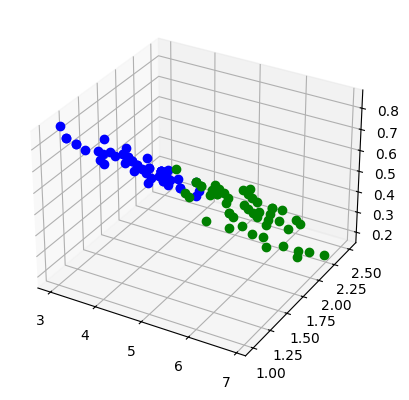

In [44]:
plot_nn(v_data, -0.6, 4.8)

# Exercise 2e

In [45]:
print()
simple_classifier(v_data, -0.6, 4.8, 84)
simple_classifier(v_data, -0.6, 4.8, 99)
simple_classifier(v_data, -0.6, 4.8, 10)
simple_classifier(v_data, -0.6, 4.8, 67)
print()


Point: ['6.1', '2.6', '5.6', '1.4', 'virginica']
0.5099986668799655
Point: ['5.9', '3', '5.1', '1.8', 'virginica']
0.48500449838059
Point: ['5', '2', '3.5', '1', 'versicolor']
0.8455347349164652
Point: ['7.7', '3.8', '6.7', '2.2', 'virginica']
0.19466158359157792



# Question 3
## Exercise 3a

In [46]:
print(meanSquaredError(v_data, -45, 6, 10))
print(meanSquaredError(v_data, -44, 7, 11))
print()

0.01796329790199592
0.12307696038234514



#### Exercise 3b

0


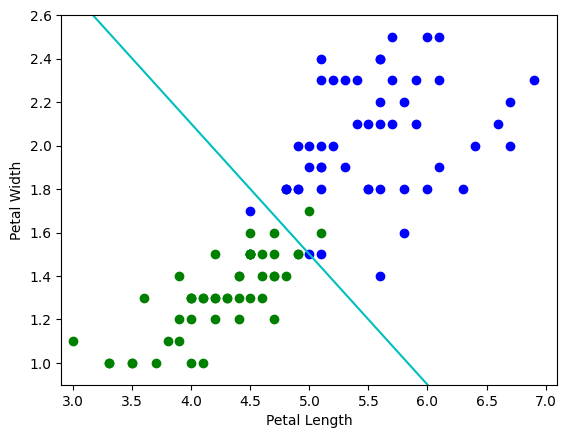

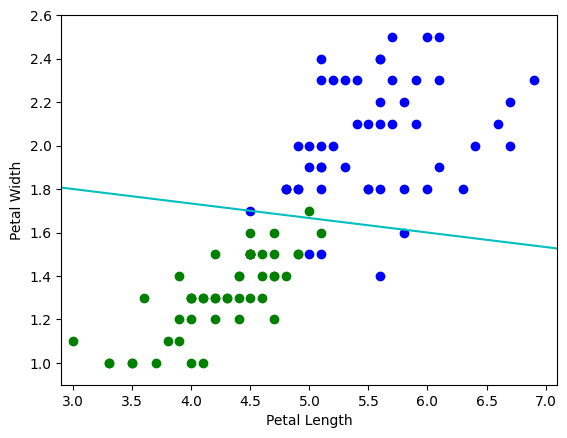

In [47]:
print(meanSquaredError_2Points(v_data, -45, 6, 10, -30, 1, 15))
plot_data_line(v_data, -45, 6, 10, 'c', 'solid', True)
plot_data_line(v_data, -30, 1, 15, 'c', 'solid', True)

## Exercise 3e

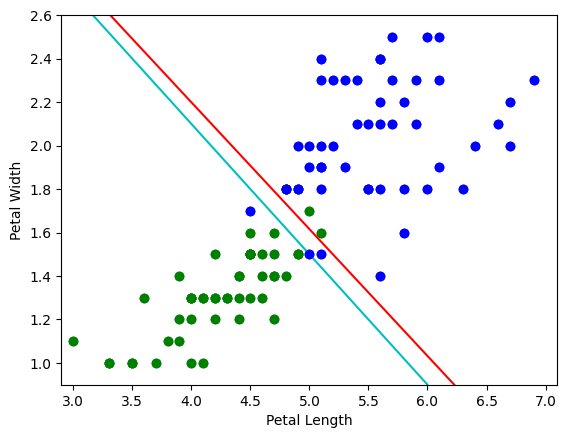

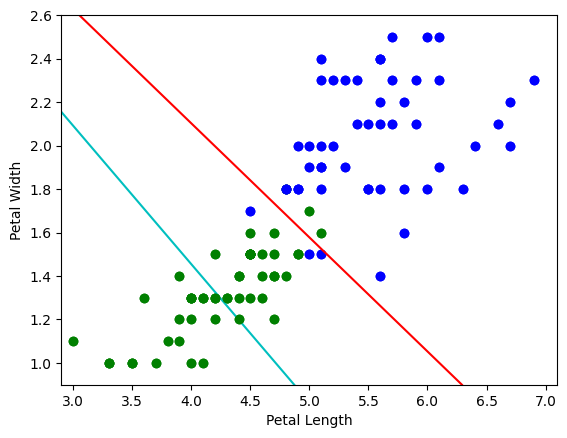

[0.03366477293414474, 0.14626016094127767, 0.04462930610836618]

In [48]:
gradient_sum(v_data, -45, 6, 10)
gradient_sum(v_data, -44, 7, 11)

# Question 4
## Exercise 4a

In [49]:
print(gradient_decent(v_data, -44, 7, 11))



[-44.30022811718424, 5.614288322713114, 10.56230542617966]


## Exercise 4b

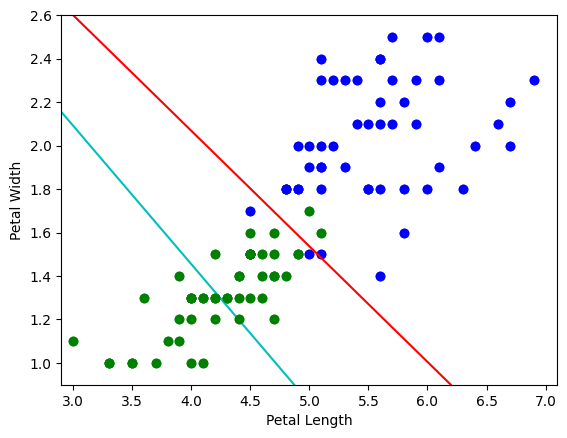

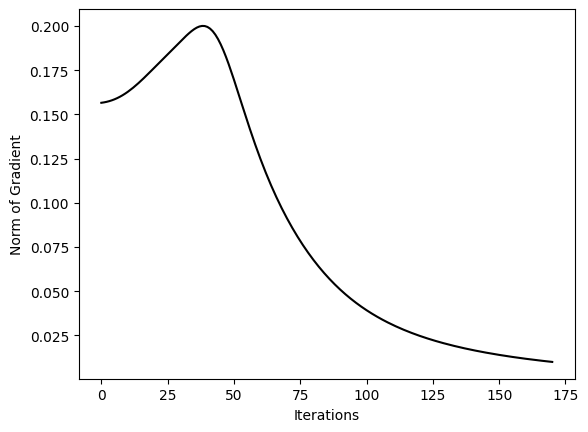

([-44.30022811718424, 5.614288322713114, 10.56230542617966],
 [0.15657945771712908,
  0.15681012567836256,
  0.15711970323469285,
  0.15751303133496564,
  0.15799411640306008,
  0.1585660154984781,
  0.1592307209192171,
  0.15998905042541112,
  0.1608405504217892,
  0.16178342060771342,
  0.1628144696727371,
  0.16392911239251728,
  0.1651214186913682,
  0.16638422453808857,
  0.16770931254399288,
  0.16908766646606088,
  0.17050979821660567,
  0.17196613838856115,
  0.17344747199292684,
  0.17494539075840995,
  0.1764527230926334,
  0.1779638941524852,
  0.17947516310737796,
  0.1809846841910982,
  0.18249234368303688,
  0.1839993369911663,
  0.18550746815764382,
  0.1870181772816882,
  0.18853132804077913,
  0.19004381614192556,
  0.19154808884337618,
  0.19303069455645194,
  0.19447100860987115,
  0.19584030405080935,
  0.1971013502581151,
  0.1982087198017414,
  0.19910995576749915,
  0.19974768798893125,
  0.20006268178218536,
  0.19999766109966022,
  0.19950158827110398,
  0.1985

In [50]:
show_gradient_decent(v_data, -44, 7, 11)

## Exercise 4c

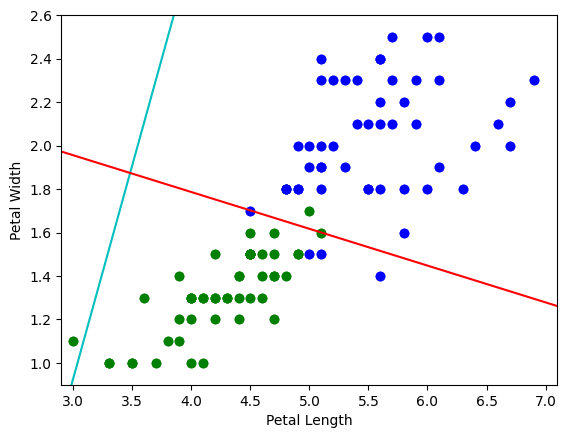

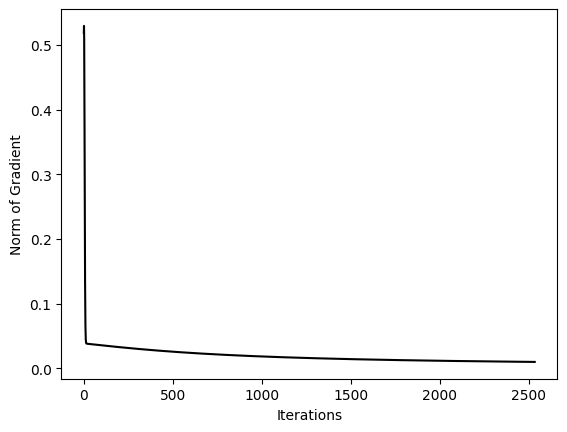

([-6.396369420476406, 0.43942927480220173, 2.5967564922878568],
 [0.5184931111032585,
  0.5293170859578006,
  0.5103039041582796,
  0.45507319463094803,
  0.37112802297800274,
  0.2785535262229955,
  0.19681042746011726,
  0.13490495064229546,
  0.09276634983354298,
  0.0665314096690691,
  0.051714496857526125,
  0.044212608203465474,
  0.040767297701330675,
  0.03927963146618754,
  0.03865020448679625,
  0.038377928677248666,
  0.038250637324952284,
  0.038181542190169525,
  0.03813568757204214,
  0.03809909322934034,
  0.03806618681991159,
  0.03803475128572948,
  0.038003905510440014,
  0.03797329961095495,
  0.03794279477114422,
  0.037912335984075715,
  0.03788190150533141,
  0.03785148278661731,
  0.037821076513139505,
  0.03779068144506616,
  0.03776029716498613,
  0.03772992358130058,
  0.0376995607313346,
  0.03766920870326907,
  0.03763886760516827,
  0.03760853755268054,
  0.03757821866414559,
  0.03754791105864134,
  0.037517614855202094,
  0.03748733017250143,
  0.03745705

In [51]:
random_gradient_decent(v_data)